In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('results_2024_winners.csv')

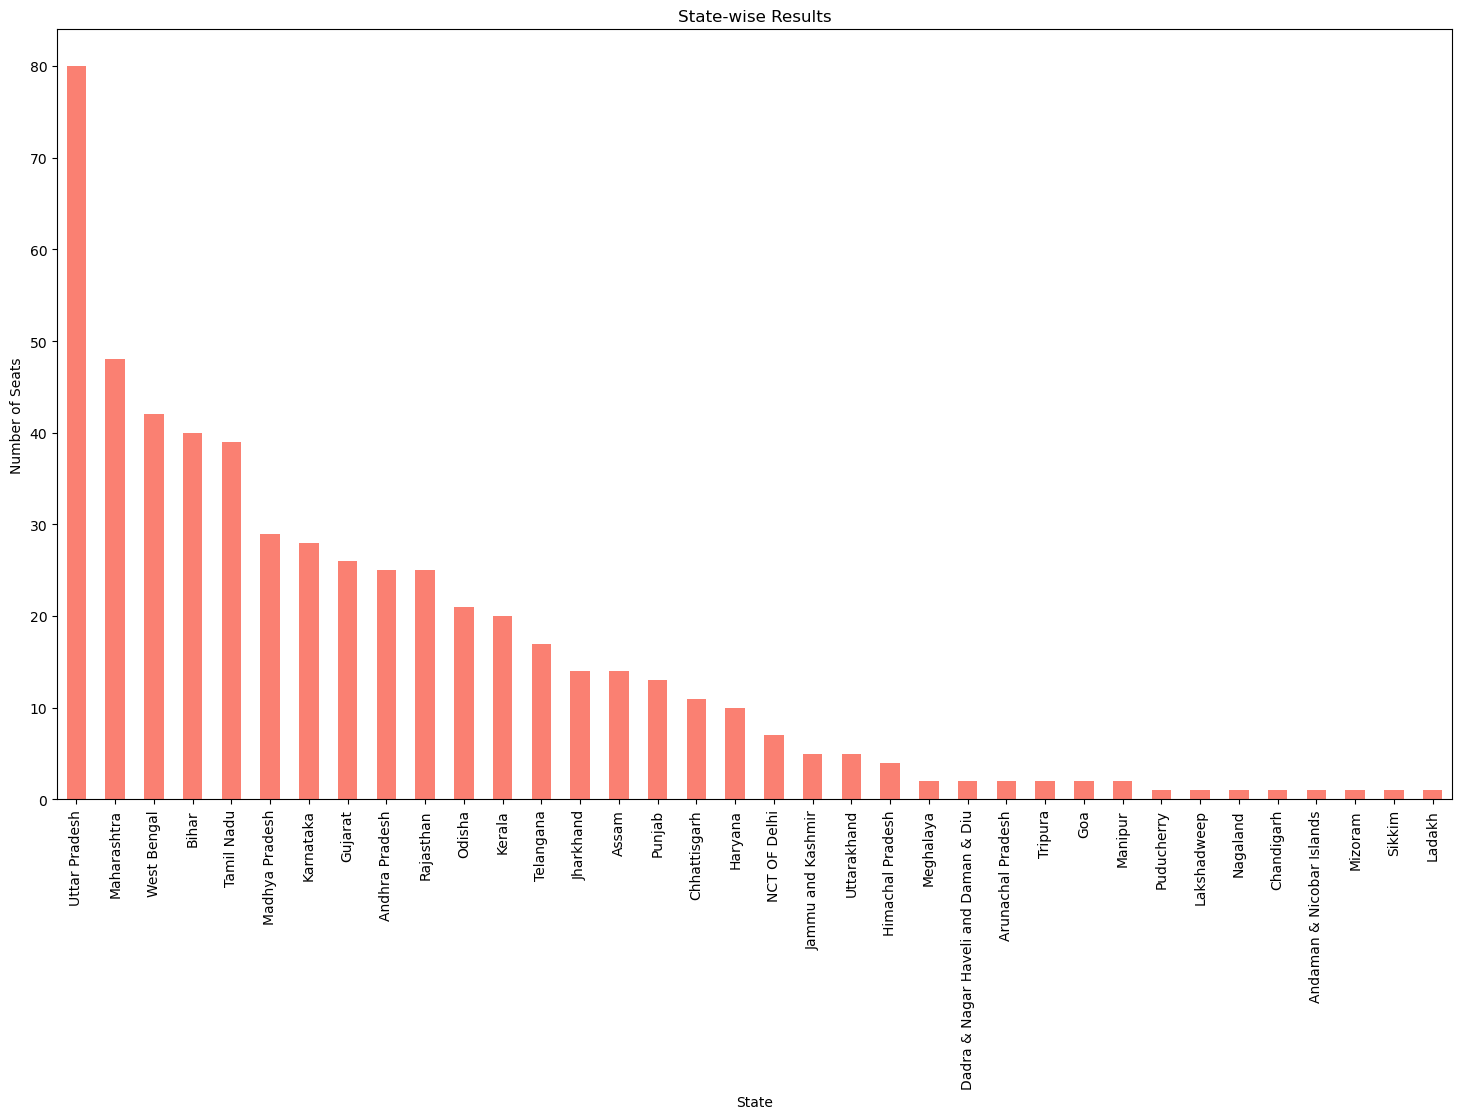

In [3]:
#Plotting State-wise Results**:

plt.figure(figsize=(18, 10))
state_wise_results = df['State'].value_counts()
state_wise_results.plot(kind='bar', color='salmon')
plt.title('State-wise Results')
plt.xlabel('State')
plt.ylabel('Number of Seats')
plt.show()


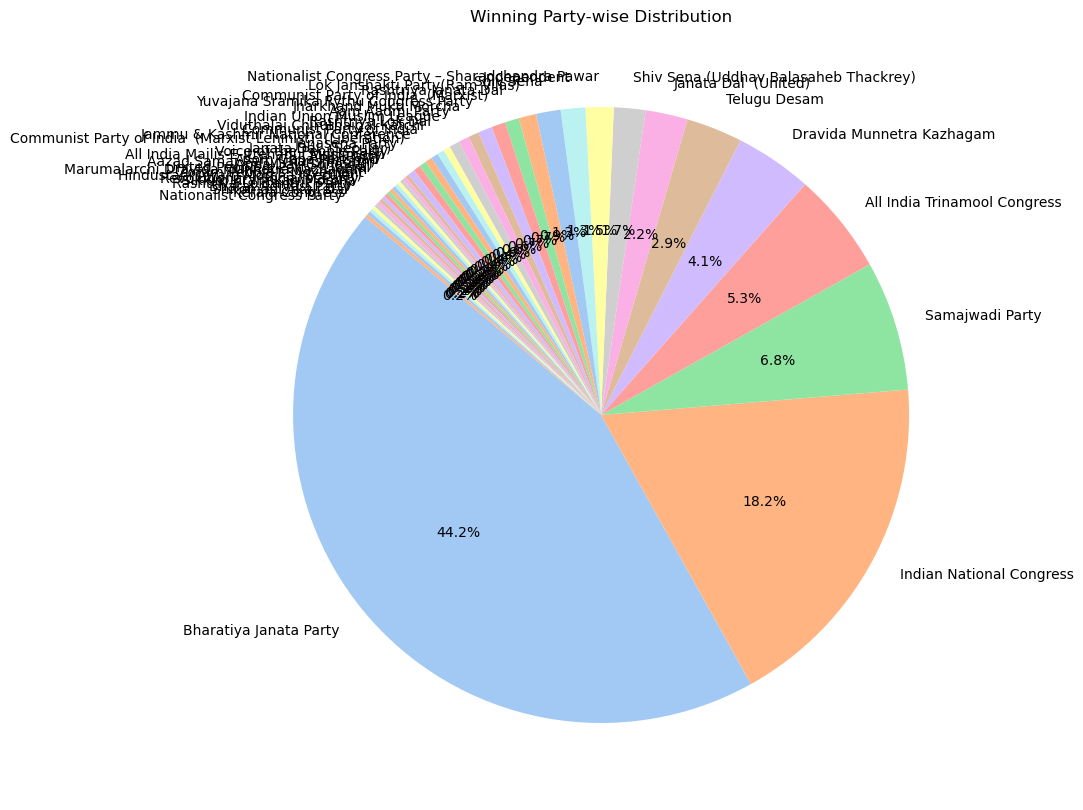

In [7]:
#Creating a Pie Chart for Party-wise Results**:

plt.figure(figsize=(10, 10))
party_share = df['Winning Party'].value_counts()
labels = party_share.index
plt.pie(party_share, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Winning Party-wise Distribution')
plt.show()

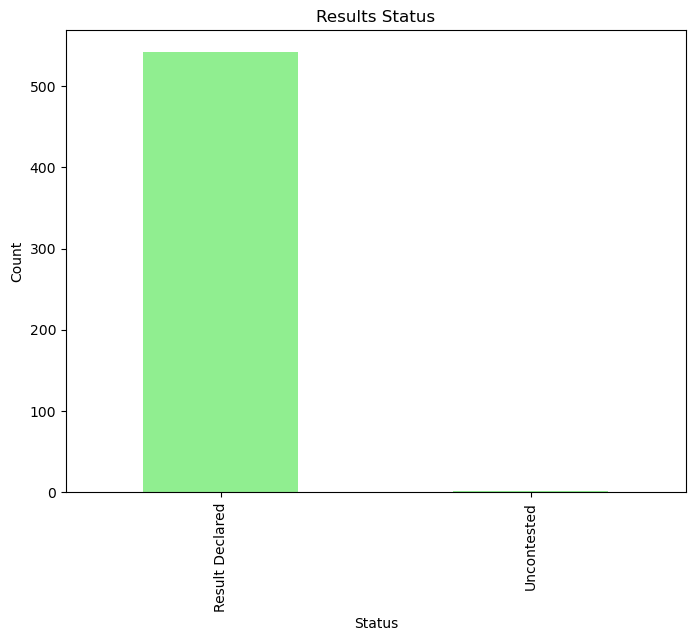

In [9]:
 #Visualization of Results Status**:

plt.figure(figsize=(8, 6))
results_status = df['Results Status'].value_counts()
results_status.plot(kind='bar', color='lightgreen')
plt.title('Results Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

<AxesSubplot: xlabel='State'>

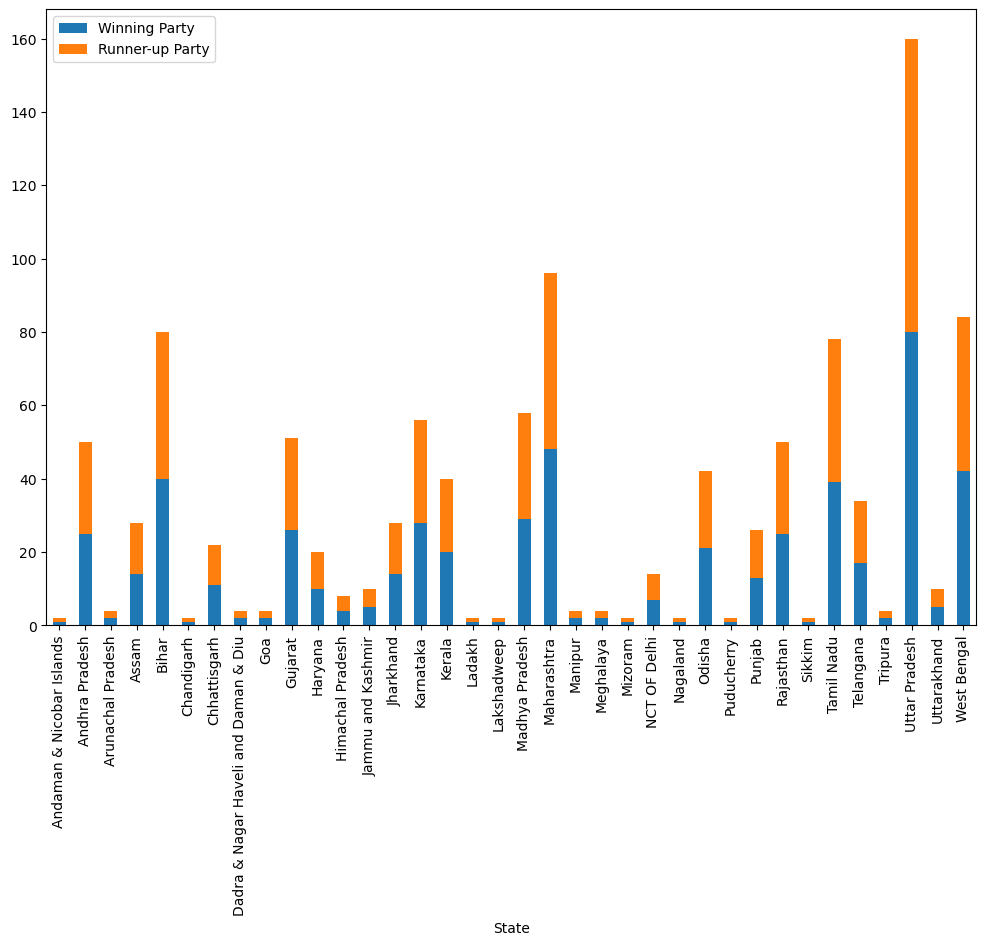

In [5]:
#Stacked bar chart for winner and runner-up party distribution by state:**

state_party_counts = df.groupby('State')[['Winning Party', 'Runner-up Party']].count()
state_party_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

Text(0.5, 1.0, 'Winning Party Counts')

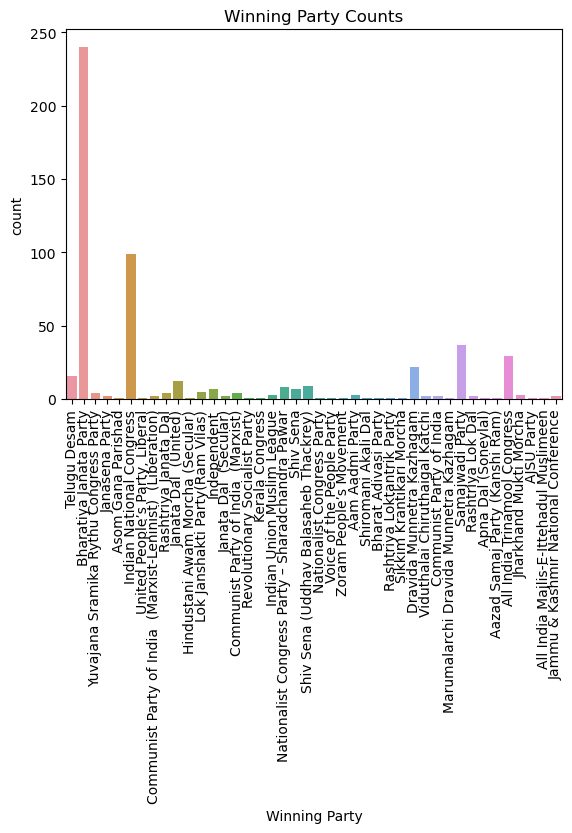

In [16]:
#Bar plot of winning party counts
sns.countplot(x='Winning Party', data=df)
plt.xticks(rotation=90)
plt.title('Winning Party Counts')

<AxesSubplot: >

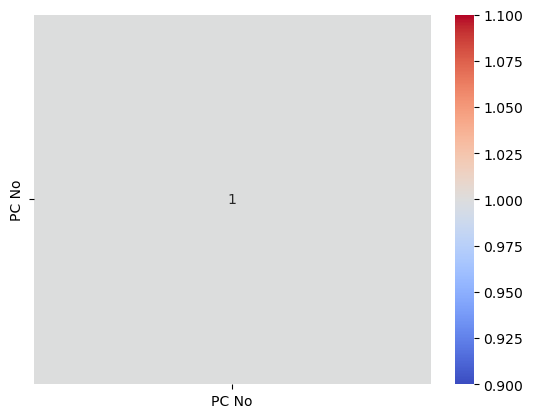

In [22]:
#Heatmap of correlation between quantitative variables
sns.heatmap(df.select_dtypes(include=['int64']).corr(), annot=True, cmap='coolwarm')

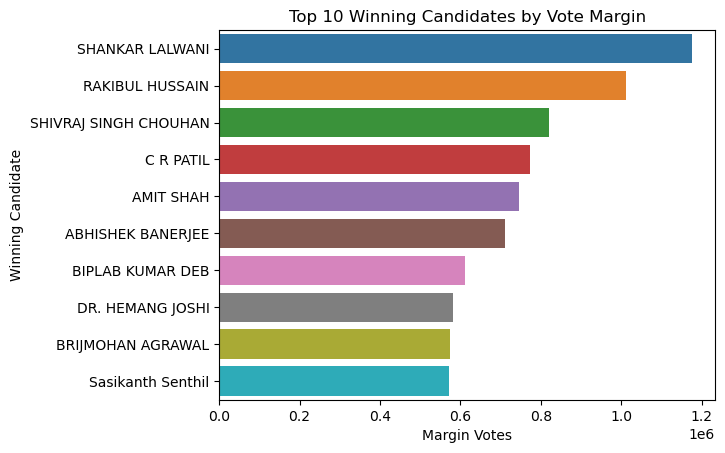

In [25]:
# Convert 'Margin Votes' to numeric dtype
df['Margin Votes'] = pd.to_numeric(df['Margin Votes'], errors='coerce')

# Select the top 10 winners based on vote margin
top_10_winners = df.nlargest(10, 'Margin Votes', 'all')

# Create a barplot
sns.barplot(x='Margin Votes', y='Winning Candidate', data=top_10_winners)
plt.title('Top 10 Winning Candidates by Vote Margin')
plt.show()


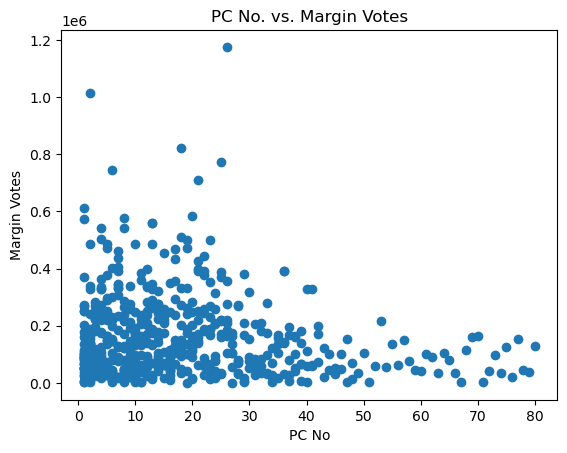

In [28]:
import matplotlib.pyplot as plt

# Remove non-finite values from 'Margin Votes' column
cleaned_df = df.dropna(subset=['Margin Votes'])
cleaned_df = cleaned_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Margin Votes'])

plt.scatter(cleaned_df['PC No'], cleaned_df['Margin Votes'].astype(float))
plt.xlabel('PC No')
plt.ylabel('Margin Votes')
plt.title('PC No. vs. Margin Votes')

plt.show()


Text(0.5, 1.0, 'Margin Votes by Results Status')

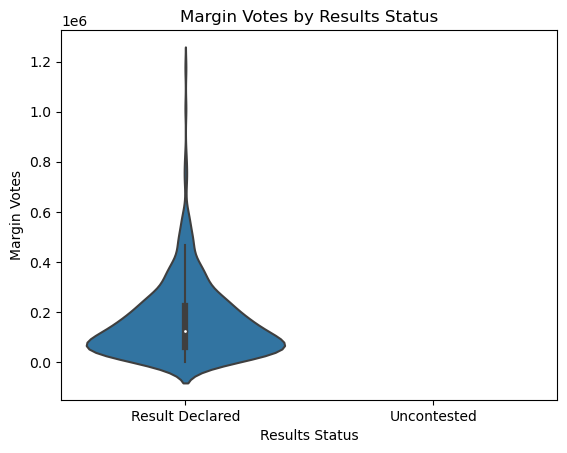

In [29]:
 #Violin plot of margin votes by results status
sns.violinplot(x='Results Status', y='Margin Votes', data=df, scale='width')
plt.title('Margin Votes by Results Status')

Text(0.5, 1.0, 'Winning Candidates Count by PC Name (Top 10)')

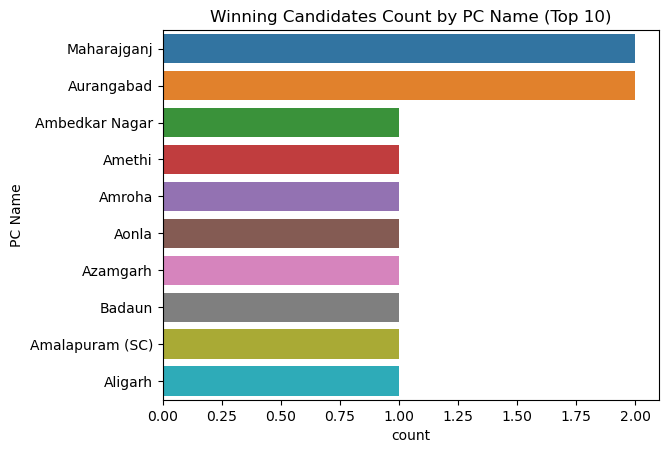

In [34]:
#Count of winning candidates by PC Name
sns.countplot(y='PC Name', data=df, order=df['PC Name'].value_counts().index[:10])
plt.title('Winning Candidates Count by PC Name (Top 10)')

In [39]:
# Grouping the data by 'Winning Candidate' and counting the number of occurrences
candidate_counts = df['Winning Candidate'].value_counts()

# Getting the candidates who won from two or more PC Names
candidates_won_from_multiple_pc = candidate_counts[candidate_counts >= 2].index.tolist()

print(candidates_won_from_multiple_pc)

['RAHUL GANDHI']


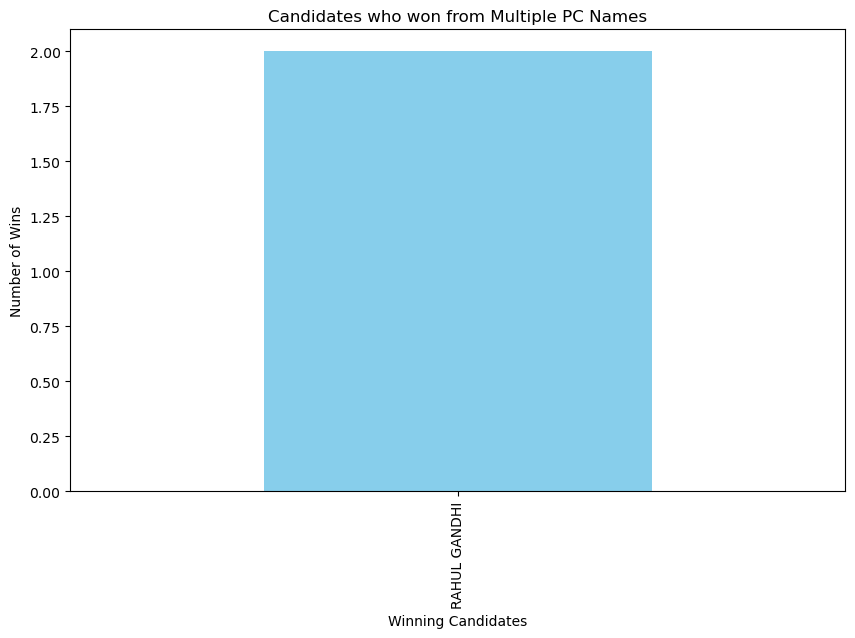

In [41]:
candidate_counts = df['Winning Candidate'].value_counts()

# Getting the candidates who won from two or more PC Names
candidates_won_from_multiple_pc = candidate_counts[candidate_counts >= 2]

# Plotting the candidates who won from two or more PC Names
plt.figure(figsize=(10, 6))
candidates_won_from_multiple_pc.plot(kind='bar', color='skyblue')
plt.title('Candidates who won from Multiple PC Names')
plt.xlabel('Winning Candidates')
plt.ylabel('Number of Wins')
plt.show()